In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#작업폴도로 이동
%cd /content/drive/MyDrive/_프로젝트_교육생/상관관계_네트워크차트

/content/drive/MyDrive/_프로젝트_교육생/상관관계_네트워크차트


In [3]:
pwd

'/content/drive/MyDrive/_프로젝트_교육생/상관관계_네트워크차트'

In [ ]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [5]:
#코랩에서 plt 한글 깨짐 해결
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# 위의 모듈 설치 후 메뉴[런타임-런타임 다시 시작]을 해야 함

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = 'NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
fm._rebuild()

In [22]:
from konlpy.tag import Okt, Mecab
import pandas as pd
import numpy as np
import seaborn as sns
import re

mecab = Mecab()

In [7]:
df=pd.read_csv('./최종_전세사기_all_.csv')
df.head()

,Unnamed: 0,title,내용,내용1(응답),description,태그,날짜,조회수,link
0,0,서울 갭투자,재개발 말이나오는 지역에 갭투자를 했는데요 재작년 말쯤이었고 원래는 세대원으로 살다...,재개발의 경우는 서울 투자한 곳에 실거주하지 않아도 조합원 자격이 ...,재개발 말이나오는 지역에 <b>갭투자</b>를 했는데요 재작년 말쯤이었고 원래는 세...,"분양, 청약",2022.10.05,48.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
1,1,부동산 경매 갭투자,부동산 경매와 갭투자는 어떤구조로 되어있는지 각각 알려주세요 수익금은 둘중 뭐가더 ...,"안녕하세요, 질문자님​부동산경매와 갭투자에 대해 질문을 주셨네요!​...",부동산 경매와 <b>갭투자</b>는 어떤구조로 되어있는지 각각 알려주세요 수익금은....,경매,2022.09.04,370.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
2,2,갭투자에 관한 질문이에요.,NaN,질문에 답변드리겠습니다. 갭투자를 한 후 현 임차인이 퇴거를 하는 ...,<b>갭투자</b>에 관한 질문이에요. 집값이 떨어질 때 제가 집을 매매하려고 하잖...,매매,2022.09.13,90.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
3,3,김포 빌라 갭투자,제가 김포쪽으로 신축빌라를 하나 사서 제 지인에게 전세를 놓고 싶은데 전세가 안되는...,네전세는 다 놓을수있어요근데 요즘 집값이 떨어지는 추세라 전셋값도 ...,... 아무 집이든 <b>갭투자</b>가 가능한건가요? 안녕하세요... 집과사람들...,매매,2022.10.02,62.0,https://kin.naver.com/qna/detail.naver?d1id=4&...
4,4,개인회생 개시결정후 갭투자,개인회생 개시가 나서 월변제금을 납부하고있고 아직 인가결정은 안났습니다.그런데 아버...,개인회생 개시가 나서 월변제금을 납부하고있고 아직 인가결정은 안났습...,... 그런데 아버지가 부동산업을 하시는데 부동산을 <b>갭투자</b>를 전세 1억...,"신용, 파산",2022.06.05,216.0,https://kin.naver.com/qna/detail.naver?d1id=6&...


# 명사 추출

## 1. 제목에서 명사 추출

In [9]:
#내용에서 명사 추출
df['내용']=df['내용'].fillna('')
nouns=[mecab.nouns(i) for i in df['내용']]


In [ ]:
nouns[:10]

[['서울', '갭', '투자'],
 ['부동산', '경매', '갭', '투자'],
 ['갭', '투자', '질문'],
 ['김포', '빌라', '갭', '투자'],
 ['개인', '회생', '개시', '결정', '후', '갭', '투자'],
 ['갭', '투자', '담보', '대출', '공문서', '위조'],
 ['갭', '투자', '뜻'],
 ['갭', '투자'],
 ['부동산', '전세', '갭', '투자', '질문'],
 ['갭', '투자', '질문']]

In [10]:
# 문서별 제목 명사 추출 pickle로 저장

import pickle
with open('nouns_contents.pickle', 'wb') as f:
    pickle.dump(nouns, f, pickle.HIGHEST_PROTOCOL)

# load
# with open('nouns.pickle', 'rb') as f:
#     data = pickle.load(f)

# 2. 단어 필드 제목 _ 단어 unique

In [40]:
wordList=[]
vocab=sorted(list(set([n for i in nouns for n in i])))
#한글자음, 한자 삭제
tmp=[''.join(re.findall('[가-힣a-zA-Z0-9]+',i)) for i in vocab]
vocab=[i for i in sorted(list(set(tmp))) if i!='']

In [41]:
vocab[:10]

['가', '가가', '가개', '가게', '가격', '가격대', '가결', '가계', '가계부', '가계약']

In [66]:
#stopword
stopword=['관련','문','질문','시','사항','주','일','것','수','거','것', '억', '원', '일','제', '월', '년','만', '거', '후','중', '천','전', '게', '등']

vocab=[i for i in vocab if i not in stopword]
vocab[:10]

['가', '가가', '가개', '가게', '가격', '가격대', '가결', '가계', '가계부', '가계약']

# 3. TF

In [67]:
dtm=[]
for i in nouns:
    dtm.append([])
    for j in vocab:
        dtm[-1].append(i.count(j))
tf_df=pd.DataFrame(dtm, columns=vocab)


In [68]:
tf_df

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#tf_df pickle로 저장
import pickle
with open('contents_tf_df.pickle', 'wb') as f:
    pickle.dump(tf_df, f, pickle.HIGHEST_PROTOCOL)


# 4. IDF

In [70]:
D=len(tf_df) #총문서수
df=tf_df.astype(bool).sum()
idf=np.log10(D/(df+1))
idf

가      2.449478
가가     3.051538
가개     3.051538
가게     2.122119
가격     1.252198
         ...   
히틀러    3.051538
힌      3.051538
힐      2.750508
힐링     2.750508
힘      2.097296
Length: 10289, dtype: float64

In [71]:
#idf pickle로 저장
with open('contents_idf.pickle', 'wb') as f:
    pickle.dump(idf, f, pickle.HIGHEST_PROTOCOL)

# 5. TF_IDF

In [72]:
tfidf=tf_df*idf
tfidf

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.097296
2248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [73]:
#tfidf_ pickle로 저장
with open('contents_tfidf_df.pickle', 'wb') as f:
    pickle.dump(tfidf, f, pickle.HIGHEST_PROTOCOL)

In [74]:
tfidf.corr()

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
가,1.000000,-0.001177,-0.001177,-0.003026,0.083856,-0.001177,-0.001665,-0.003334,-0.001665,0.044472,...,-0.001177,-0.001665,-0.001665,-0.001177,-0.001177,-0.001177,-0.001177,-0.001791,-0.002039,-0.002993
가가,-0.001177,1.000000,-0.000444,-0.001142,-0.004430,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,-0.000444,-0.000676,-0.000770,-0.001130
가개,-0.001177,-0.000444,1.000000,-0.001142,0.121858,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,-0.000444,-0.000676,-0.000770,0.080929
가게,-0.003026,-0.001142,-0.001142,1.000000,-0.004176,-0.001142,-0.001616,0.037252,-0.001616,-0.009295,...,0.056027,-0.001616,0.443157,-0.001142,-0.001142,-0.001142,-0.001142,-0.001739,0.097085,0.067433
가격,0.083856,-0.004430,0.121858,-0.004176,1.000000,0.121858,0.217031,0.009810,-0.006267,-0.013512,...,-0.004430,0.083053,-0.006267,-0.004430,-0.004430,-0.004430,0.311291,0.259392,0.028796,0.050886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히틀러,-0.001177,-0.000444,-0.000444,-0.001142,-0.004430,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,0.706950,-0.000444,1.000000,1.000000,-0.000444,-0.000676,-0.000770,-0.001130
힌,-0.001177,-0.000444,-0.000444,-0.001142,0.311291,-0.000444,0.706950,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,1.000000,0.702088,-0.000770,0.080929
힐,-0.001791,-0.000676,-0.000676,-0.001739,0.259392,-0.000676,0.496083,-0.001915,-0.000956,-0.005501,...,-0.000676,-0.000956,-0.000956,-0.000676,-0.000676,-0.000676,0.702088,1.000000,-0.001172,0.113566
힐링,-0.002039,-0.000770,-0.000770,0.097085,0.028796,-0.000770,-0.001089,0.407067,-0.001089,-0.006263,...,-0.000770,-0.001089,-0.001089,-0.000770,-0.000770,-0.000770,-0.000770,-0.001172,1.000000,0.187634


# # 상위노출(50)개 단어 (상관관계): TF

In [76]:
vocab_50=tf_df.sum().sort_values(ascending=False)[:50].index

In [77]:
vocab_50

Index(['전세', '개인', '집', '계약', '회생', '주인', '파산', '대출', '부동산', '사기', '매매', '계약서',
       '보험', '보증금', '보증', '신청', '임대인', '가능', '저', '때', '말', '경우', '확인', '신고',
       '상태', '건물', '상황', '진행', '돈', '사람', '은행', '주택', '연락', '세입자', '전세금', '정도',
       '경매', '계약금', '이사', '분', '문제', '방법', '근저당', '저희', '가입', '빌라', '생각',
       '중개사', '압류', '일자'],
      dtype='object')

In [78]:
tf_50=tf_df[vocab_50]

In [79]:
tf_50

,전세,개인,집,계약,회생,주인,파산,대출,부동산,사기,...,문제,방법,근저당,저희,가입,빌라,생각,중개사,압류,일자
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,5,0,2,1,0,0,0,7,0,0,...,0,0,0,1,0,1,3,0,0,0
2248,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2249,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2250,1,0,0,7,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [80]:
tf_50.columns

Index(['전세', '개인', '집', '계약', '회생', '주인', '파산', '대출', '부동산', '사기', '매매', '계약서',
       '보험', '보증금', '보증', '신청', '임대인', '가능', '저', '때', '말', '경우', '확인', '신고',
       '상태', '건물', '상황', '진행', '돈', '사람', '은행', '주택', '연락', '세입자', '전세금', '정도',
       '경매', '계약금', '이사', '분', '문제', '방법', '근저당', '저희', '가입', '빌라', '생각',
       '중개사', '압류', '일자'],
      dtype='object')

In [81]:
tf_50.corr()

,전세,개인,집,계약,회생,주인,파산,대출,부동산,사기,...,문제,방법,근저당,저희,가입,빌라,생각,중개사,압류,일자
전세,1.000000,-0.001953,0.284126,0.313189,-0.004936,0.243863,-0.005513,0.158723,0.226255,0.324033,...,0.110966,0.065473,0.248911,0.099547,0.215755,0.153746,0.100823,0.097561,0.027894,0.262425
개인,-0.001953,1.000000,0.111777,-0.019738,0.999417,-0.021224,0.999072,0.039231,0.076456,0.040947,...,0.205821,0.850808,0.012461,-0.003138,0.024362,-0.017518,0.145396,-0.011718,0.957262,0.031029
집,0.284126,0.111777,1.000000,0.287191,0.109964,0.758785,0.112528,0.015120,0.279478,0.119335,...,0.183588,0.154282,0.180310,0.243073,0.146469,0.075089,0.270538,0.008544,0.143422,0.224346
계약,0.313189,-0.019738,0.287191,1.000000,-0.022086,0.298555,-0.021419,0.003746,0.410090,0.145407,...,0.219303,0.039204,0.198361,0.362288,0.187284,0.057839,0.246836,0.214822,0.016423,0.196972
회생,-0.004936,0.999417,0.109964,-0.022086,1.000000,-0.022407,0.998411,0.029589,0.072377,0.038684,...,0.202269,0.848861,0.010804,-0.005728,0.022411,-0.018600,0.141342,-0.013075,0.958168,0.030700
주인,0.243863,-0.021224,0.758785,0.298555,-0.022407,1.000000,-0.021504,-0.006893,0.224826,0.074537,...,0.103486,0.017599,0.212658,0.079204,0.100850,0.099441,0.181210,0.038199,0.023342,0.266861
파산,-0.005513,0.999072,0.112528,-0.021419,0.998411,-0.021504,1.000000,0.018108,0.072968,0.039109,...,0.201883,0.853174,0.012704,-0.005101,0.020167,-0.018511,0.144458,-0.012897,0.955158,0.031226
대출,0.158723,0.039231,0.015120,0.003746,0.029589,-0.006893,0.018108,1.000000,0.044650,0.047062,...,0.073429,0.033768,0.000693,0.014334,0.096313,0.033612,0.116905,-0.002365,0.015670,0.001474
부동산,0.226255,0.076456,0.279478,0.410090,0.072377,0.224826,0.072968,0.044650,1.000000,0.113100,...,0.211017,0.139306,0.082805,0.150457,0.110155,0.073254,0.194970,0.244173,0.073968,0.050449
사기,0.324033,0.040947,0.119335,0.145407,0.038684,0.074537,0.039109,0.047062,0.113100,1.000000,...,0.130003,0.142777,0.049957,0.222578,0.206177,0.118662,0.084783,0.055659,0.061394,0.132274


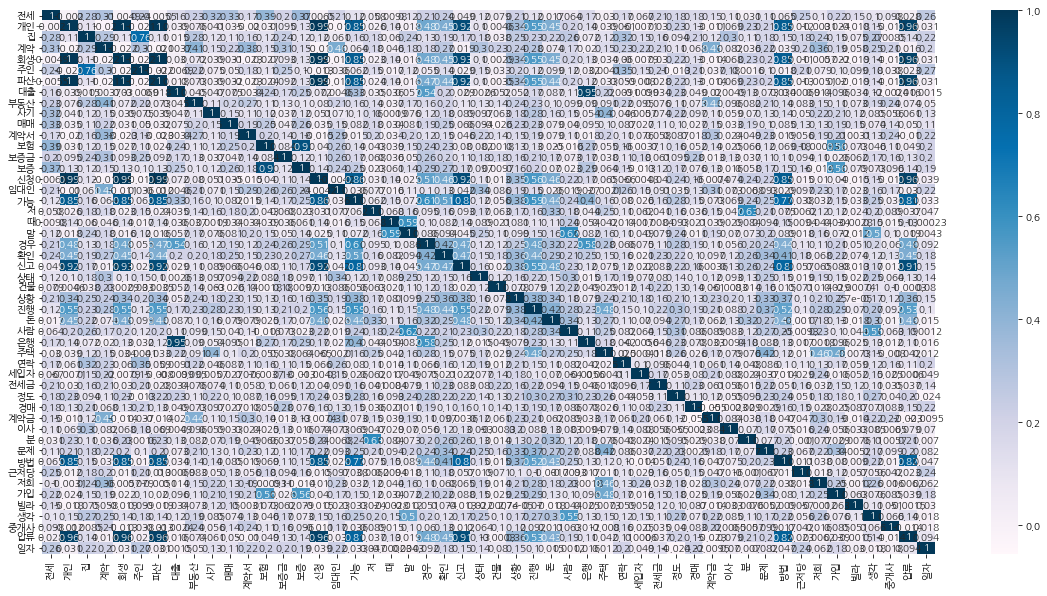

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(tf_50.corr(),annot=True,cmap = 'PuBu')

In [83]:
tf50_corr=tf_50.corr()

In [85]:
tf50_corr[tf50_corr['전세']>=0.3]

,전세,개인,집,계약,회생,주인,파산,대출,부동산,사기,...,문제,방법,근저당,저희,가입,빌라,생각,중개사,압류,일자
전세,1.000000,-0.001953,0.284126,0.313189,-0.004936,0.243863,-0.005513,0.158723,0.226255,0.324033,...,0.110966,0.065473,0.248911,0.099547,0.215755,0.153746,0.100823,0.097561,0.027894,0.262425
계약,0.313189,-0.019738,0.287191,1.000000,-0.022086,0.298555,-0.021419,0.003746,0.410090,0.145407,...,0.219303,0.039204,0.198361,0.362288,0.187284,0.057839,0.246836,0.214822,0.016423,0.196972
사기,0.324033,0.040947,0.119335,0.145407,0.038684,0.074537,0.039109,0.047062,0.113100,1.000000,...,0.130003,0.142777,0.049957,0.222578,0.206177,0.118662,0.084783,0.055659,0.061394,0.132274
매매,0.326257,0.034636,0.108417,0.216359,0.031316,0.050223,0.032174,0.074536,0.196456,0.152982,...,0.101085,0.084621,0.131065,0.133377,0.194779,0.150896,0.074083,0.140535,0.049847,0.109667
보험,0.389019,0.030783,0.116797,0.150210,0.027439,0.110225,0.024479,0.244621,0.108139,0.122144,...,0.115357,0.069007,0.184572,-0.000929,0.557391,0.072963,0.045982,0.105684,0.049255,0.202397
보증,0.365566,0.131966,0.117191,0.153985,0.128791,0.103195,0.126186,0.254725,0.099536,0.116410,...,0.170576,0.148042,0.156257,-0.014003,0.561435,0.079255,0.072606,0.096485,0.137546,0.185457


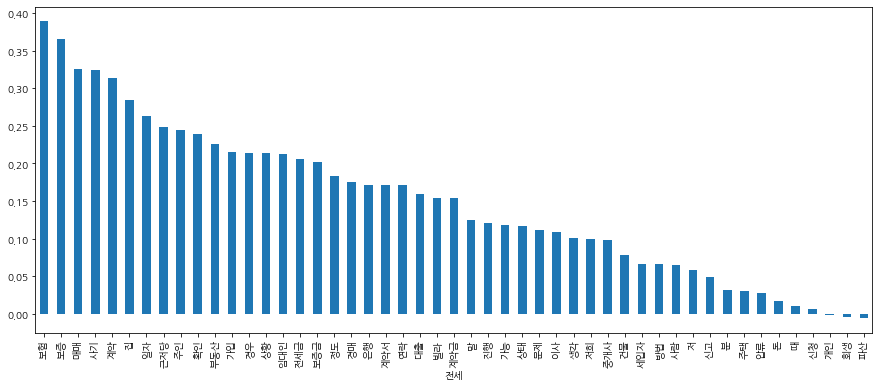

In [86]:
#특정단어와 관련한 상관관계
search='전세'
tf50_corr[search].sort_values(ascending=False)[1:].plot(kind='bar',figsize=(15,6))
plt.xlabel(search)
plt.savefig(f'./내용분석/{search}_freq50_tf.png')
plt.show()

# # 특정 단어 (상관관계): TF 전체 데이터

In [87]:
#전체 단어 상관계수
tf_df_corr=tf_df.corr()
tf_df_corr

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
가,1.000000,-0.001177,-0.001177,-0.003026,0.083856,-0.001177,-0.001665,-0.003334,-0.001665,0.044472,...,-0.001177,-0.001665,-0.001665,-0.001177,-0.001177,-0.001177,-0.001177,-0.001791,-0.002039,-0.002993
가가,-0.001177,1.000000,-0.000444,-0.001142,-0.004430,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,-0.000444,-0.000676,-0.000770,-0.001130
가개,-0.001177,-0.000444,1.000000,-0.001142,0.121858,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,-0.000444,-0.000676,-0.000770,0.080929
가게,-0.003026,-0.001142,-0.001142,1.000000,-0.004176,-0.001142,-0.001616,0.037252,-0.001616,-0.009295,...,0.056027,-0.001616,0.443157,-0.001142,-0.001142,-0.001142,-0.001142,-0.001739,0.097085,0.067433
가격,0.083856,-0.004430,0.121858,-0.004176,1.000000,0.121858,0.217031,0.009810,-0.006267,-0.013512,...,-0.004430,0.083053,-0.006267,-0.004430,-0.004430,-0.004430,0.311291,0.259392,0.028796,0.050886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히틀러,-0.001177,-0.000444,-0.000444,-0.001142,-0.004430,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,0.706950,-0.000444,1.000000,1.000000,-0.000444,-0.000676,-0.000770,-0.001130
힌,-0.001177,-0.000444,-0.000444,-0.001142,0.311291,-0.000444,0.706950,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,1.000000,0.702088,-0.000770,0.080929
힐,-0.001791,-0.000676,-0.000676,-0.001739,0.259392,-0.000676,0.496083,-0.001915,-0.000956,-0.005501,...,-0.000676,-0.000956,-0.000956,-0.000676,-0.000676,-0.000676,0.702088,1.000000,-0.001172,0.113566
힐링,-0.002039,-0.000770,-0.000770,0.097085,0.028796,-0.000770,-0.001089,0.407067,-0.001089,-0.006263,...,-0.000770,-0.001089,-0.001089,-0.000770,-0.000770,-0.000770,-0.000770,-0.001172,1.000000,0.187634


In [88]:
tfidf_corr=tfidf.corr()
tfidf_corr

,가,가가,가개,가게,가격,가격대,가결,가계,가계부,가계약,...,희생자,흰색,히,히라가나,히브리,히틀러,힌,힐,힐링,힘
가,1.000000,-0.001177,-0.001177,-0.003026,0.083856,-0.001177,-0.001665,-0.003334,-0.001665,0.044472,...,-0.001177,-0.001665,-0.001665,-0.001177,-0.001177,-0.001177,-0.001177,-0.001791,-0.002039,-0.002993
가가,-0.001177,1.000000,-0.000444,-0.001142,-0.004430,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,-0.000444,-0.000676,-0.000770,-0.001130
가개,-0.001177,-0.000444,1.000000,-0.001142,0.121858,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,-0.000444,-0.000676,-0.000770,0.080929
가게,-0.003026,-0.001142,-0.001142,1.000000,-0.004176,-0.001142,-0.001616,0.037252,-0.001616,-0.009295,...,0.056027,-0.001616,0.443157,-0.001142,-0.001142,-0.001142,-0.001142,-0.001739,0.097085,0.067433
가격,0.083856,-0.004430,0.121858,-0.004176,1.000000,0.121858,0.217031,0.009810,-0.006267,-0.013512,...,-0.004430,0.083053,-0.006267,-0.004430,-0.004430,-0.004430,0.311291,0.259392,0.028796,0.050886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히틀러,-0.001177,-0.000444,-0.000444,-0.001142,-0.004430,-0.000444,-0.000628,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,0.706950,-0.000444,1.000000,1.000000,-0.000444,-0.000676,-0.000770,-0.001130
힌,-0.001177,-0.000444,-0.000444,-0.001142,0.311291,-0.000444,0.706950,-0.001258,-0.000628,-0.003615,...,-0.000444,-0.000628,-0.000628,-0.000444,-0.000444,-0.000444,1.000000,0.702088,-0.000770,0.080929
힐,-0.001791,-0.000676,-0.000676,-0.001739,0.259392,-0.000676,0.496083,-0.001915,-0.000956,-0.005501,...,-0.000676,-0.000956,-0.000956,-0.000676,-0.000676,-0.000676,0.702088,1.000000,-0.001172,0.113566
힐링,-0.002039,-0.000770,-0.000770,0.097085,0.028796,-0.000770,-0.001089,0.407067,-0.001089,-0.006263,...,-0.000770,-0.001089,-0.001089,-0.000770,-0.000770,-0.000770,-0.000770,-0.001172,1.000000,0.187634


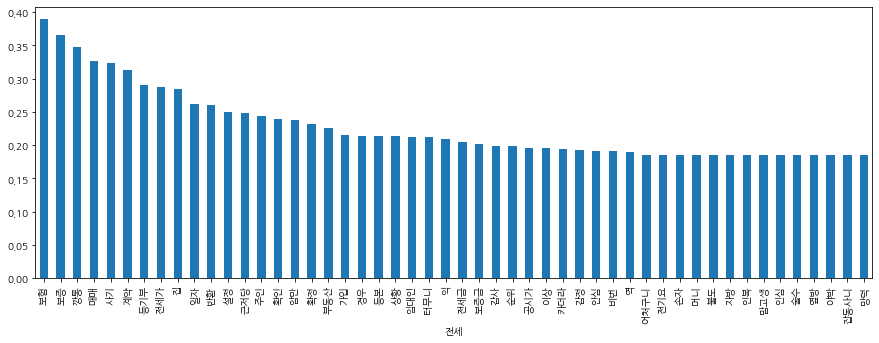

In [92]:
search='전세'
cnt=50

tf_df_corr[search].sort_values(ascending=False)[1:cnt+1].plot(kind='bar',figsize=(15,5))
plt.xlabel(search)
plt.savefig(f'./내용분석/{search}_전체단어_tf.png')
plt.show()